In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [5]:
from sklearn import model_selection, linear_model, metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
zeshan_csv=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
zeshan_labels=zeshan_csv['SalePrice']

In [7]:
zero_count=zeshan_csv.isnull().sum(axis = 0)

#remove columns without zero
zero_count=zero_count[zero_count > 0]
zero_count.sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [8]:
numerical_columns=['BsmtFinSF2','TotalBsmtSF' , 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF','LotArea' , '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
numbers_data=zeshan_csv[numerical_columns]
numbers_data=numbers_data.fillna(0)


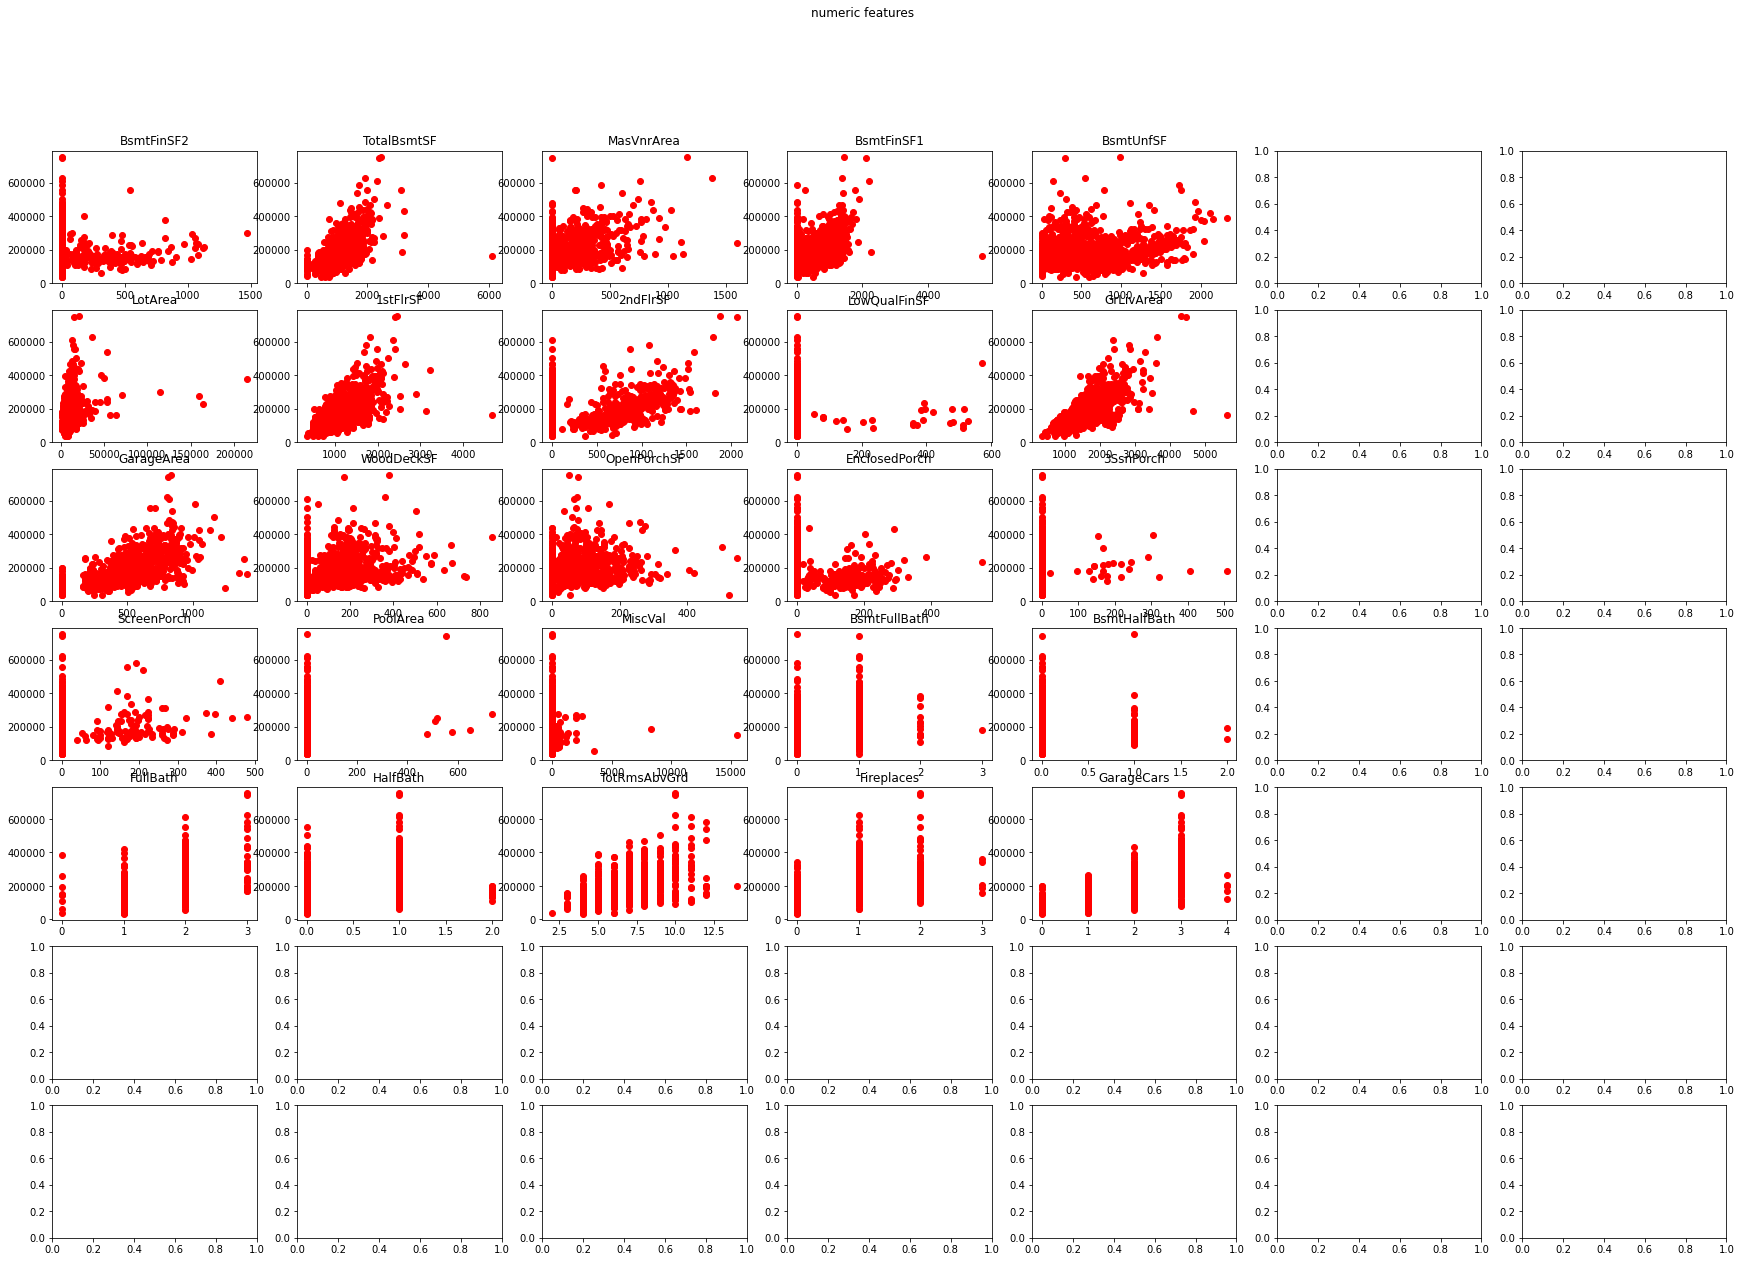

In [9]:
fig, axs = plt.subplots (7,7)
fig.set_size_inches(30,20)

fig.suptitle('numeric features')
for i,feature in enumerate(numbers_data.columns):
    axs[i//5, i%5].scatter(numbers_data[feature], zeshan_csv['SalePrice'], color='red')
    axs[i//5, i%5].set_title(feature)

In [10]:
corr_labels=numbers_data.corrwith(zeshan_labels)
corr_labels.sort_values()

EnclosedPorch   -0.128578
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
dtype: float64

In [11]:
numerical_columns=['LotArea', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea']
numbers_data=numbers_data[numerical_columns]

In [12]:
correlation_vectors=numbers_data.corr(method ='pearson')
correlation_vectors

,LotArea,OpenPorchSF,2ndFlrSF,WoodDeckSF,BsmtFinSF1,Fireplaces,MasVnrArea,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea
LotArea,1.000000,0.084774,0.050986,0.171698,0.214103,0.271364,0.103321,0.190015,0.126031,0.299475,0.260833,0.180403,0.154871,0.263116
OpenPorchSF,0.084774,1.000000,0.208026,0.058661,0.111761,0.169405,0.122528,0.234192,0.259977,0.211671,0.247264,0.241435,0.213569,0.330224
2ndFlrSF,0.050986,0.208026,1.000000,0.092165,-0.137079,0.194561,0.173800,0.616423,0.421378,-0.202646,-0.174512,0.138347,0.183926,0.687501
WoodDeckSF,0.171698,0.058661,0.092165,1.000000,0.204306,0.200019,0.159991,0.165984,0.187703,0.235459,0.232019,0.224666,0.226342,0.247433
BsmtFinSF1,0.214103,0.111761,-0.137079,0.204306,1.000000,0.260011,0.261256,0.044316,0.058543,0.445863,0.522396,0.296970,0.224054,0.208171
Fireplaces,0.271364,0.169405,0.194561,0.200019,0.260011,1.000000,0.247015,0.326114,0.243671,0.410531,0.339519,0.269141,0.300789,0.461679
MasVnrArea,0.103321,0.122528,0.173800,0.159991,0.261256,0.247015,1.000000,0.279568,0.272999,0.339850,0.360067,0.370884,0.361945,0.388052
TotRmsAbvGrd,0.190015,0.234192,0.616423,0.165984,0.044316,0.326114,0.279568,1.000000,0.554784,0.409516,0.285573,0.337822,0.362289,0.825489
FullBath,0.126031,0.259977,0.421378,0.187703,0.058543,0.243671,0.272999,0.554784,1.000000,0.380637,0.323722,0.405656,0.469672,0.630012
1stFlrSF,0.299475,0.211671,-0.202646,0.235459,0.445863,0.410531,0.339850,0.409516,0.380637,1.000000,0.819530,0.489782,0.439317,0.566024


In [13]:
for Value_C, content in correlation_vectors.items():
    for value_R, score in content.items():
        if score>0.5 and value_R>Value_C:
            print(value_R, Value_C, score)

TotRmsAbvGrd 2ndFlrSF 0.6164226354915353
GrLivArea 2ndFlrSF 0.6875010641666008
TotalBsmtSF BsmtFinSF1 0.5223960519923907
TotRmsAbvGrd FullBath 0.5547842535334817
GrLivArea FullBath 0.6300116462511144
TotalBsmtSF 1stFlrSF 0.8195299750050355
GrLivArea 1stFlrSF 0.5660239689357487
GarageCars GarageArea 0.8824754142814603
TotRmsAbvGrd GrLivArea 0.8254893743088377


In [14]:
numbers_data.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF', 'GarageArea', 'BsmtFinSF1','GrLivArea', 'FullBath', 'GarageCars','TotRmsAbvGrd'], axis = 1, inplace = True)

In [15]:
numbers_data.skew()


LotArea        12.207688
OpenPorchSF     2.364342
WoodDeckSF      1.541376
Fireplaces      0.649565
MasVnrArea      2.677616
dtype: float64

In [16]:
numbers_data.kurt()

LotArea        203.243271
OpenPorchSF      8.490336
WoodDeckSF       2.992951
Fireplaces      -0.217237
MasVnrArea      10.141416
dtype: float64

In [18]:
rank_columns = ['OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2','Functional']
rank_data=zeshan_csv[rank_columns]

In [19]:
rank_data=rank_data.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[5, 4, 3, 2, 1])
rank_data=rank_data.replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],[6, 5, 4, 3, 2, 1])
rank_data=rank_data.replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2','Sev','Sal'],[8, 7, 6, 5, 4, 3, 2, 1])

In [20]:
rank_data=rank_data.fillna(0)

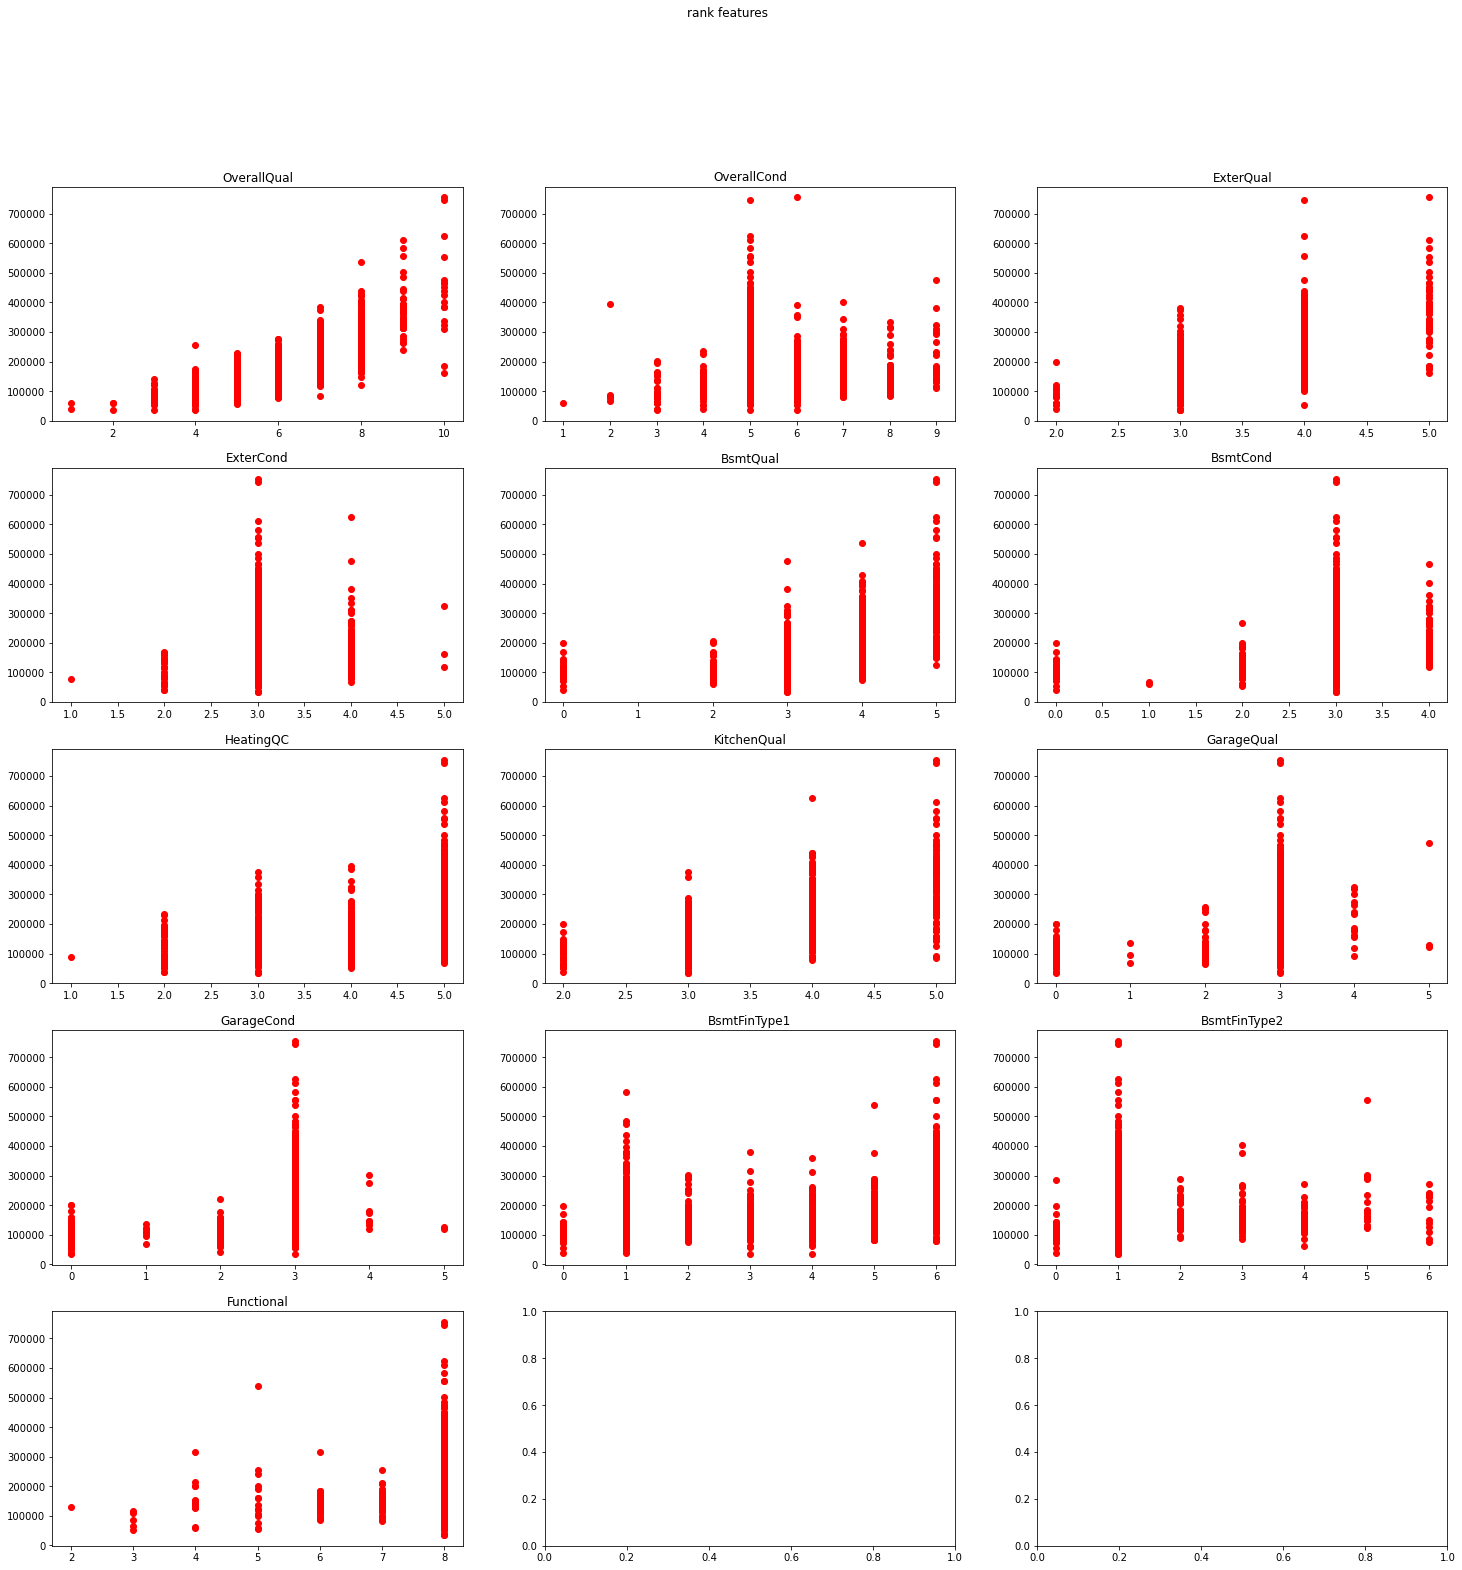

In [23]:
fig, axs = plt.subplots (5,3)
fig.set_size_inches(25,25)

fig.suptitle('rank features')
for i,feature in enumerate(rank_data.columns):
    axs[i//3, i%3].scatter(rank_data[feature], zeshan_csv['SalePrice'], color='red')
    axs[i//3, i%3].set_title(feature)

In [24]:
corr_labels=rank_data.corrwith(zeshan_labels)
corr_labels.sort_values()

OverallCond    -0.077856
BsmtFinType2   -0.005323
ExterCond       0.018899
Functional      0.107619
BsmtCond        0.212607
GarageCond      0.263191
GarageQual      0.273839
BsmtFinType1    0.304908
HeatingQC       0.427649
BsmtQual        0.585207
KitchenQual     0.659600
ExterQual       0.682639
OverallQual     0.790982
dtype: float64

In [25]:
rank_columns=['HeatingQC', 'BsmtQual', 'KitchenQual', 'ExterQual', 'OverallQual']
rank_data=rank_data[rank_columns]

In [26]:
corr_matrix=rank_data.corr(method ='pearson')
corr_matrix

,HeatingQC,BsmtQual,KitchenQual,ExterQual,OverallQual
HeatingQC,1.000000,0.397169,0.504228,0.520027,0.457083
BsmtQual,0.397169,1.000000,0.510938,0.565558,0.629379
KitchenQual,0.504228,0.510938,1.000000,0.716122,0.673331
ExterQual,0.520027,0.565558,0.716122,1.000000,0.726278
OverallQual,0.457083,0.629379,0.673331,0.726278,1.000000


In [32]:
for label_c, content in corr_matrix.items():
    for label_r, score in content.items():
        if score>0.7 and label_r>label_c:
            print(label_r, label_c, score)

KitchenQual ExterQual 0.7161221955032785
OverallQual ExterQual 0.7262784907641455


In [39]:
def linear_regression():
    Y_zeshan=zeshan_csv['SalePrice']
    Y_zeshan = np.log1p(Y_zeshan)
    X_zeshan=numbers_data(zeshan_csv)
    regressor=linear_model.SGDRegressor()
    
    # SGDRegressor
    regressor.fit(X_zeshan,Y_zeshan)
    
    #perform cross-validation
    scorer=metrics.make_scorer(metrics.mean_squared_error)
    linear_scoring = model_selection.cross_val_score(regressor, X_zeshan, Y_zeshan, scoring=scorer, cv = 5)
    print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))
    
    #predict results
    X_test=numbers_data(test_csv)
    ridge_predictions = regressor.predict(X_test)
    ridge_predictions_restored=np.expm1(ridge_predictions)
    
    return ridge_predictions_restored

In [40]:
test_csv=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')